# Let us present some model dynamics.

In [21]:
#!/usr/bin/env python3
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sys
from scipy.special import stdtrit

# Import the data
if sys.platform == 'darwin':
    df = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/code/rundata/run_data.csv")

# Atomicity of investors

When investors have no influence on the funds' wealth and return (```wealth_reset = True```):
* The significance of the investors' decision making increases with their time horizon H. Long horizons identify differences of many standard deviations between the funds (strategies).
* Investment ratios converge to fixed attractors.

When investors have influence on the funds' wealth and return (```wealth_reset = False```):
* The positive relationship between significance and time horizon H is broken. There are standard deviations of difference at very low time horizons (daily to weekly). 
* At longer (yearly) horizons, there is often no statistically significant difference identified among the strategies. 
* For low values of H, the system coordinates tend to be more interior 
* We observe cyclic behavior in investment flows.

More questions
* Are the cycles lengths connected to H?

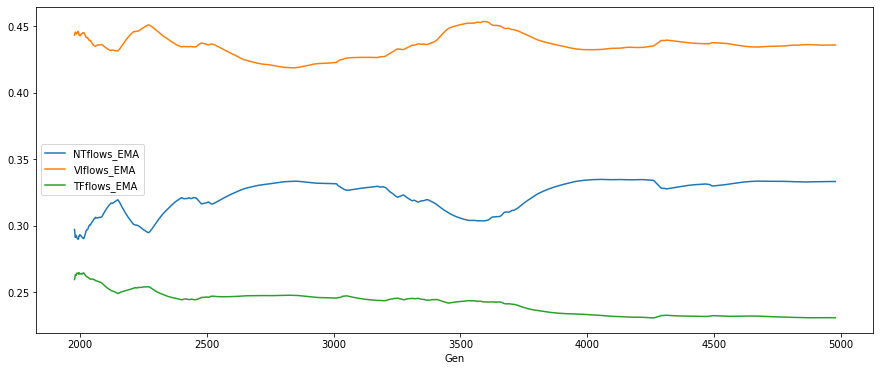

In [22]:
span = 252

df['NTflows_EMA'] = pd.Series.ewm(df['NTflows'].tail(3000), span=span).mean()
df['VIflows_EMA'] = pd.Series.ewm(df['VIflows'].tail(3000), span=span).mean()
df['TFflows_EMA'] = pd.Series.ewm(df['TFflows'].tail(3000), span=span).mean()

df.plot(x="Gen", y = ["NTflows_EMA", "VIflows_EMA", "TFflows_EMA"],
        kind="line", figsize=(15, 6))
plt.show()

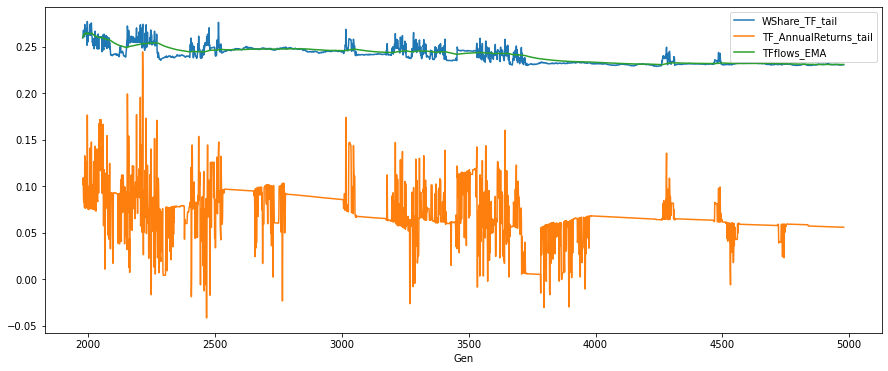

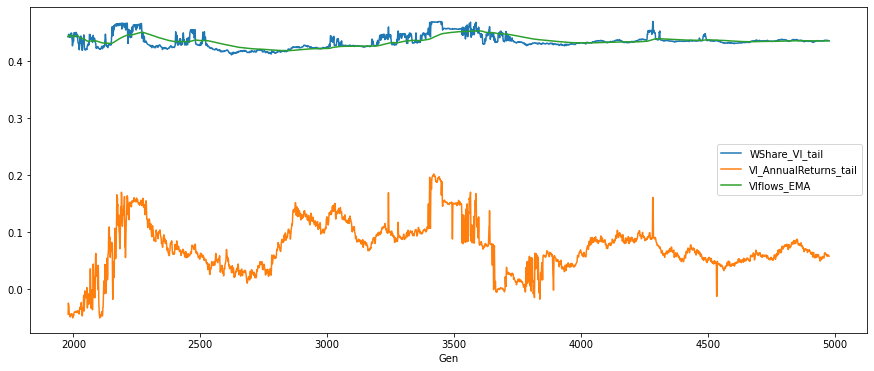

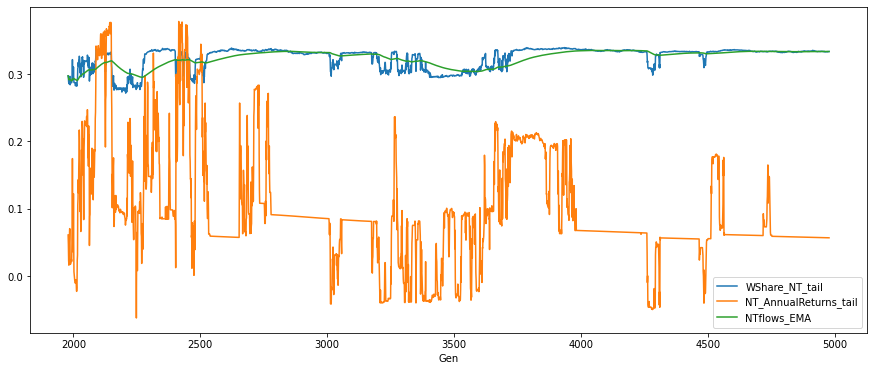

In [23]:
''' What relationship between returns, wealth shares and investment flows? '''

df['TF_AnnualReturns_tail'] = df['TF_AnnualReturns'].tail(3000)
df['VI_AnnualReturns_tail'] = df['VI_AnnualReturns'].tail(3000)
df['NT_AnnualReturns_tail'] = df['NT_AnnualReturns'].tail(3000)
df['WShare_TF_tail'] = df['WShare_TF'].tail(3000) / 100
df['WShare_VI_tail'] = df['WShare_VI'].tail(3000) / 100
df['WShare_NT_tail'] = df['WShare_NT'].tail(3000) / 100

df.plot(x="Gen", y = ["WShare_TF_tail", "TF_AnnualReturns_tail", "TFflows_EMA"],
        kind="line", figsize=(15, 6))
plt.show()

df.plot(x="Gen", y = ["WShare_VI_tail", "VI_AnnualReturns_tail", "VIflows_EMA"],
        kind="line", figsize=(15, 6))
plt.show()

df.plot(x="Gen", y = ["WShare_NT_tail", "NT_AnnualReturns_tail", "NTflows_EMA"],
        kind="line", figsize=(15, 6))
plt.show()

# df.plot(x="Gen", y = ["WShare_TF_tail", "TF_AnnualReturns_tail", "VI_AnnualReturns_tail", "NT_AnnualReturns_tail", "TFflows_EMA", "VIflows_EMA", "NTflows_EMA"],
#         kind="line", figsize=(15, 6))
# plt.show()

* Flows seem to be driving annual returns. It is important to note that investors are not measuring the Sharpes based on the returns with investment, but without. Otherwise, this leads to undesirable positive feedback loops.
* VI and NT are behaving very similarly, while TF has a very different behavior.

Annual returns are computed over wealth, so they include profits and losses from investment.
Could we show something about returns without investment?

1.991402581130667e-05


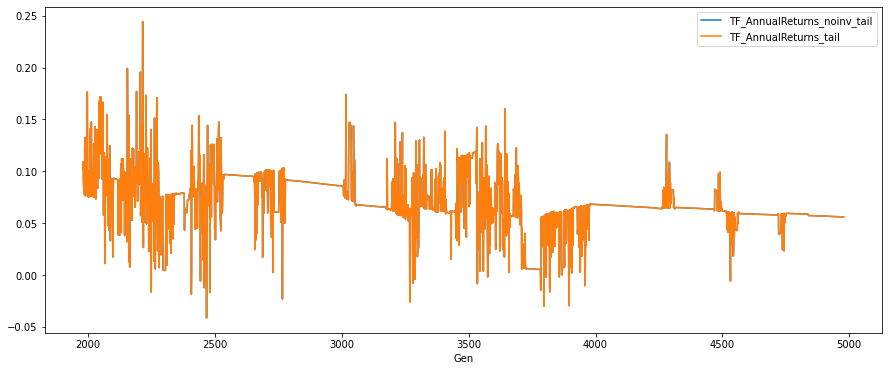

In [24]:
df['TF_AnnualReturns_noinv_tail'] = df['TF_AnnualReturns_Noinv'].tail(3000)
df['VI_AnnualReturns_noinv_tail'] = df['VI_AnnualReturns_Noinv'].tail(3000)
df['NT_AnnualReturns_noinv_tail'] = df['NT_AnnualReturns_Noinv'].tail(3000)

df['Diff'] = df['NT_AnnualReturns_noinv_tail'] - df['NT_AnnualReturns_tail']
print(df['Diff'].mean())

df.plot(x="Gen", y = ["TF_AnnualReturns_noinv_tail", "TF_AnnualReturns_tail"],
        kind="line", figsize=(15, 6))
plt.show()

The thing is, we are actually not making super right plots. Investors are based on daily returns series, not annual.
But looking at daily series, it's very hard to see anything going on.

------

Now the question becomes: what other things could explain this difference?

Wealth reset = True has wealth reset to specific coordinates, wealth is constant.
We have two things: investment has no impact, AND nothing else actually have an impact.

So to be sure it is investment and not the reset in general, we need everything but investment to have an impact to get a good comparison. 


Ex" setting invesmtent amount to 0.

So when we do this, we observe some significance even at high H.
Ex: H=252, still in average one standard deviation of difference.

There are still cycles in flows. Those flows do not matter, but it shows that investor behavior is not causing the cycles as such. It is rather the funds interactions themselves that create the cycles. However, investment amounts sort of nullify significance, they make the market efficient.

Could the cycles be different?

Does investment positive or not then impacts the wealth shares?
With investment at 0: 37, 38, 24. Singif: 0.69, 0.35.
With investment at 10M: 41, 37, 21. Signif: basically 0 and 0

There are cycles when M=0, but they are quite clean and slow. With M>0, there are so many of them!
Wealth shares are much more unstable as well, although the attractor does not look too different.


We'd need to come up with a measure or a way to demonstrate that quantitatively. 


So the narrative would be:

The "natural" market ecology generates cycles of returns. Based on interactions, strategies sort of rise and fall. The market contains some statistically significant differences in funds/strategies.
We would see long run, clean cycles in which strategies are outperforming. Order of 3 years.

When we add investors with the power of influencing the payoffs, very different. Cycles are much shorter, order of 1 year (~). Stat significance disappears. (H=252)
For lower H, H = 21. For M=0, Wealth share does not change from the one before at 0. Signif: 0.66, 0.19. Makes sense.
For this H and positive M as before, WS changes: 40, 34, 25. Short horizon benefits TF and undermines VI.
Signif changes: 0.37, 0.0, 0.41. Significance is totally eaten up. Cycles are incredibly short.

